In [1]:
import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

from LINKS import *

## Dataset

the dataset is provided in chunks of 100,000 to make sure most PC configurations can handle them within their RAM.

Below we will load one chunk and work wit that.

### Structure of Data:
As mentioned in the main readme on the repository the data consists of four files:

<ul>
    <li><b>dataset</b>: chunks of 100,000 mechanisms. Each mechanism is a ragged list contain the adancacy matrix A the initial positions x0, and the node types list indicating fixed joints. All mechanisms are actuated at the linkage connecting joints 0 and 1.</li>
    <li><b>simulations</b>: chunks of 100,000 mechanism simulations. The numerical simulations of each mechanism with 200 equally spaced points in time.</li>
    <li><b>normalized curves</b>: chunks of 100,000 mechanism worth of normalized coupler curve simulations. each entry includes the normalized curve the index of the mechanism and the index of the joint correspoding to the curve.</li>
    <li><b>curated normalized curves</b>: sames as normalized curves but currated.</li>
</ul>

In [3]:
mechanism_file = open(b"dataset","rb")
simulations_file = open(b"simulation_dataset","rb")
nomalized_file = open(b"normalized_dataset","rb")
curated_file = open(b"curated_dataset","rb")

#read one chunk of 100,000 mechanisms (simple call pickle load multiple times to load all of the data)
mechs = pickle.load(mechanism_file)
sols = pickle.load(simulations_file)
nsols = pickle.load(nomalized_file)
cnsols = pickle.load(curated_file)

mechanism_file.close()
simulations_file.close()
nomalized_file.close()
curated_file.close()

Now we will draw a random mechanism

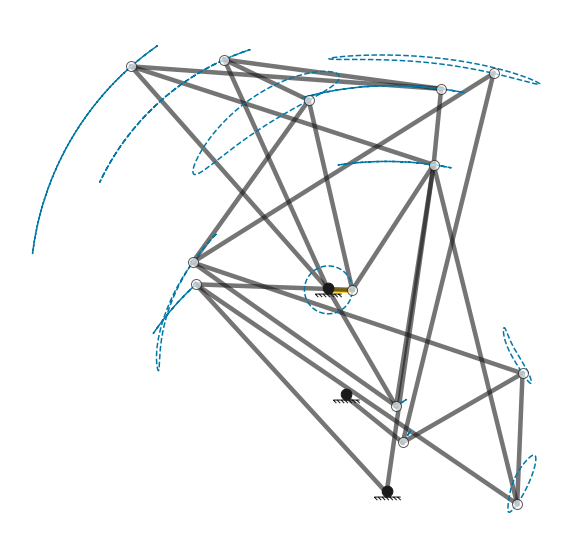

In [5]:
A,x0,node_types = mechs[np.random.choice(len(mechs))]

fixed_nodes = np.where(node_types)[0]

motor = [0,1]

plt.figure(figsize=(10,10))


draw_mechanism(A,x0,fixed_nodes,motor)

Now lets draw a random normalized curves:

Mechanism Index: 71684, Joint Index: 5


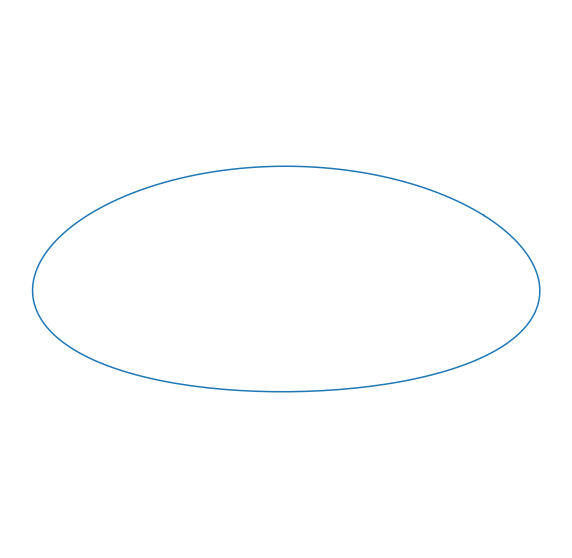

In [19]:
curve,mech_i,node_i = nsols[np.random.choice(len(nsols))]

plt.figure(figsize=(10,10))
plt.plot(curve[:,0],curve[:,1])
plt.axis('equal')
plt.axis('off')

print("Mechanism Index: %i, Joint Index: %i" % (mech_i,node_i))

Now lets draw the mechanism associated wit this normalized curve

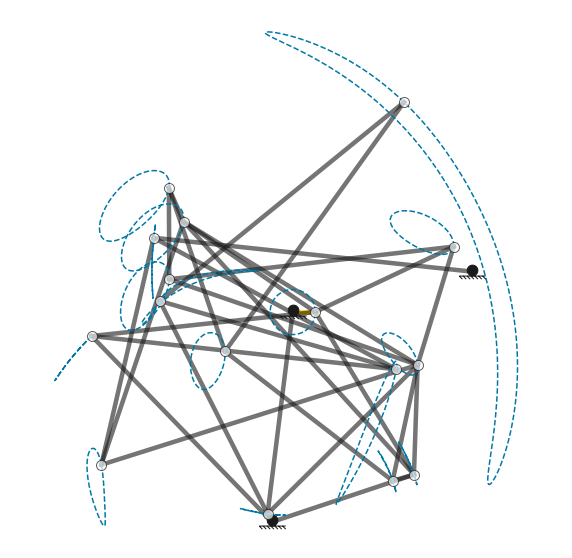

In [20]:
A,x0,node_types = mechs[mech_i]

fixed_nodes = np.where(node_types)[0]

motor = [0,1]

plt.figure(figsize=(10,10))


draw_mechanism(A,x0,fixed_nodes,motor)

Now lets simpliy the mechanism down the joint responsible for this normalized curve:

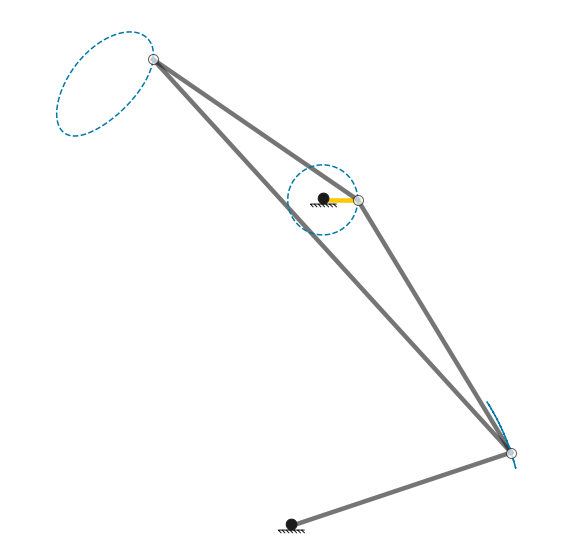

In [24]:
# Since all mechanisms are dyadically sorted we just remove the joints after the target joint
A = A[0:node_i,0:node_i]
node_types = node_types[0:node_i]
x0 = x0[0:node_i]


fixed_nodes = np.where(node_types)[0]

motor = [0,1]

plt.figure(figsize=(10,10))


draw_mechanism(A,x0,fixed_nodes,motor)